# Exchange rate prediction Using SVR

### Data exploration

In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
# load file
USD_whole = pd.read_csv('Data/USD_GHS.csv',parse_dates=['Date'],index_col='Date')

In [21]:
# Data information
USD_whole.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1643 entries, 2020-04-17 to 2014-01-01
Data columns (total 5 columns):
Price       1643 non-null float64
Open        1643 non-null float64
High        1643 non-null float64
Low         1643 non-null float64
Change %    1643 non-null float64
dtypes: float64(5)
memory usage: 77.0 KB


In [22]:
USD_whole.shape

(1643, 5)

In [23]:
USD_whole.head()

,Price,Open,High,Low,Change %
Date,,,,,
2020-04-17,5.6988,5.760,5.8350,5.650,-1.06
2020-04-16,5.7600,5.840,5.9150,5.715,-0.26
2020-04-15,5.7750,5.915,5.9200,5.650,1.58
2020-04-14,5.6850,5.740,5.8675,5.650,-2.32
2020-04-13,5.8200,5.915,5.9150,5.820,-0.17


In [24]:
# sorting values by date in ascending order
USD_whole = USD_whole.sort_values('Date')

In [25]:
## Since we are dealing with univariate data we select only the price column
USD_GHS = USD_whole[['Price']]
USD_GHS.head()

,Price
Date,
2014-01-01,2.3650
2014-01-02,2.3350
2014-01-03,2.3350
2014-01-06,2.3650
2014-01-07,2.3515


In [198]:
USD_GHS.shape

(1643, 1)

In [8]:
# Descriptive Statistics
USD_GHS.describe()

,Price
count,1643.000000
mean,4.267410
std,0.803632
min,2.335000
25%,3.820000
50%,4.320000
75%,4.811250
max,5.855000


In [200]:
# print out year with the minimum price
USD_GHS[(USD_GHS['Price']==min(USD_GHS['Price']))]

,Price
Date,
2014-01-02,2.335
2014-01-03,2.335


In [201]:
# print out year with the maximum price
USD_GHS[(USD_GHS['Price']==max(USD_GHS['Price']))]

,Price
Date,
2020-04-07,5.855


In [202]:
# ceck for missing values
USD_GHS.isnull().sum()

Price    0
dtype: int64

### Data Visualization

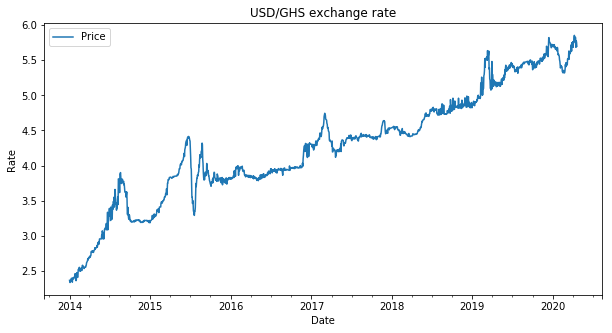

In [26]:
# print the graph of the exchange rate
import matplotlib.pyplot as plt
import seaborn as sns
USD_GHS.plot(figsize=(10,5))
plt.title("USD/GHS exchange rate")
plt.ylabel('Rate')

#save image
plt.savefig('time_s.png')
plt.show()

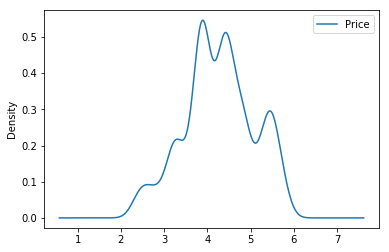

In [204]:
USD_GHS.plot(kind='kde')

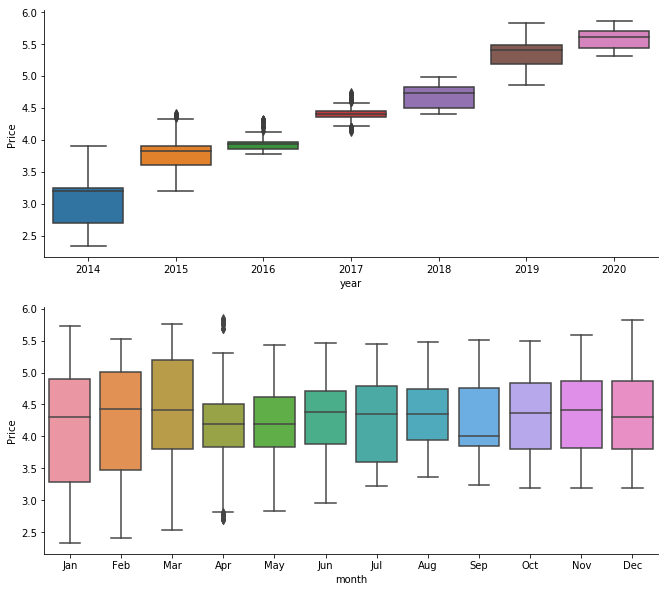

In [205]:
# Box plot to check trends and seasonal 
df = USD_GHS.copy()
df.reset_index(inplace=True)

# prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Draw plot
fig, axes = plt.subplots(2,1, figsize=(11,10))
sns.boxplot(x='year', y='Price', data=df, ax = axes[0])
sns.boxplot(x='month', y='Price', data=df, ax = axes[1])
sns.despine()
plt.show()

Text(0.5,1,'Autocorrelation Plot')

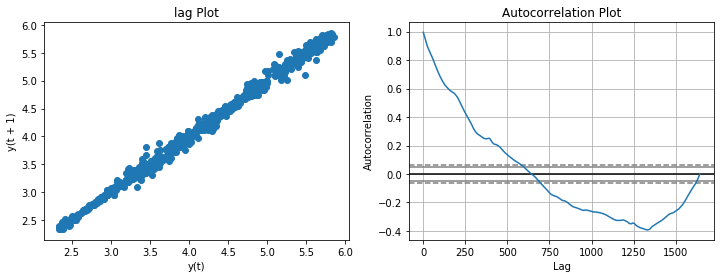

In [206]:
# Lag plot and Autocorrelation plot
from pandas.plotting import lag_plot 
from pandas.plotting import autocorrelation_plot 
fig, axes = plt.subplots(1,2, figsize=(12,4))

lag_plot(USD_GHS, ax=axes[0])
autocorrelation_plot(USD_GHS, ax = axes[1])

# set titles
axes[0].set_title('lag Plot')
axes[1].set_title('Autocorrelation Plot')

### Test for Stationarity

In [16]:
# test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(USD_GHS['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value)) # data not stationary

ADF Statistic: -1.522769
p-value: 0.522219
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [17]:
# differencing
USD_GHS['diff_1'] = USD_GHS.diff()
USD_GHS.head()

,Price,diff_1
Date,,
2014-01-01,2.3650,NaN
2014-01-02,2.3350,-0.0300
2014-01-03,2.3350,0.0000
2014-01-06,2.3650,0.0300
2014-01-07,2.3515,-0.0135


In [209]:
# test again for stationarity on the diff_1 column
result = adfuller(USD_GHS['diff_1'][1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.530064
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


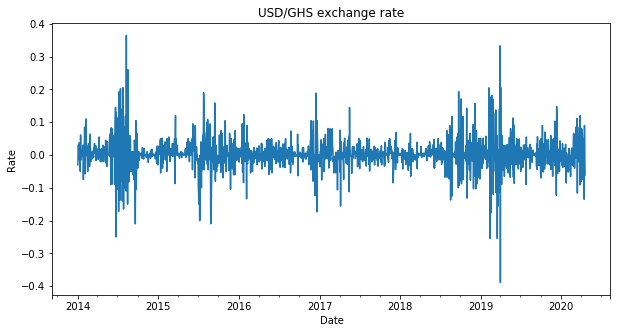

In [18]:
# plot of data
import matplotlib.pyplot as plt
import seaborn as sns
USD_GHS['diff_1'].plot(figsize=(10,5))
plt.title("USD/GHS exchange rate")
plt.ylabel('Rate')
#save image
plt.savefig('diff_s.png')
plt.show()

In [212]:
# we save the data USD.csv to the file
USD_GHS.to_csv('USD.csv', sep=',')